# Import modules

In [1]:
from IPython.core.display import display, HTML
import numpy as np
import pandas as pd
from textblob import TextBlob
import textstat

from bs4 import BeautifulSoup
import re
import statistics



# Optional: Strip HTML

In [10]:
# cols = ['ClapCount_Card', 'ClapCount_Story', 'Company', 'CompanyURL', 'PostID',
#        'PublishedDate', 'ReadingTime', 'ResponseNum_Card', 'ResponseNum_Story',
#        'StoryHTML', 'StoryIndex', 'StoryTitle', 'StoryURL', 'StoryURL_Story',
#        'Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5', 'TagSource', 'User', 'UserURL',
#        'VoterCount', 'isPaywall']


cols = ['ClapCount_Card', 'ClapCount_Story', 'Company', 'CompanyURL', 'PostID',
       'PublishedDate', 'ReadingTime', 'ResponseNum_Card', 'ResponseNum_Story',
       'StoryIndex', 'StoryTitle', 'StoryURL', 'StoryURL_Story',
       'Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5', 'TagSource', 'User', 'UserURL',
       'VoterCount', 'isPaywall']
import pandas as pd
reader = pd.read_csv('df_story.csv', chunksize=20000)
for chunk in reader:
    chunk.to_csv('df_noHTML.csv', index=False, header=False, mode='a')

    result = chunk
    result['StoryHTML'] = ''

    result.to_csv('df_noHTML.csv', index=False, header=False, mode='a')



In [ ]:
df_noHTML = pd.read_csv("df_noHTML.csv", names=cols)
display(HTML(df_noHTML.head(5).to_html()))

# Import data and filter N/A stories

In [211]:
df = pd.read_csv("data/df_story_chunk1.csv", nrows=100)
df.head()
df = df[-df['PostID'].isnull()]
df = df[-df['ReadingTime'].isnull()]

print(len(df))


98


# Load author data

In [6]:
authorStats = pd.read_csv("data/clean/authorStats.csv")

In [7]:
authorStats.columns

Index(['User', 'AuthorArticlesClap_mean', 'AuthorArticlesClap_median',
       'AuthorArticlesClap_count', 'AuthorArticlesClap_sum',
       'AuthorArticlesResponse_mean', 'AuthorArticlesResponse_median',
       'AuthorArticlesResponse_count', 'AuthorArticlesResponse_sum',
       'AuthorArticlesVoter_mean', 'AuthorArticlesVoter_median',
       'AuthorArticlesVoter_count', 'AuthorArticlesVoter_sum'],
      dtype='object')

# Load tag data

In [19]:
tagStats = pd.read_csv("data/clean/tagStats.csv")
tagStats1 =  tagStats.copy()
tagStats2 = tagStats.copy()
tagStats3 =  tagStats.copy()
tagStats4 = tagStats.copy()
tagStats5 =  tagStats.copy()
print(tagStats.columns)
tagStats1.columns = ['Tag1', 'Tag1Clap_mean', 'Tag1Clap_median', 'Tag1Clap_count', 'Tag1Clap_sum', 'Tag1Clap_std', 'Tag1Response_mean', 'Tag1Response_median','Tag1Response_count', 'Tag1Response_sum', 'Tag1Response_std', 'Tag1ReadingTime_mean', 'Tag1ReadingTime_median', 'Tag1ReadingTime_count','Tag1ReadingTime_sum', 'Tag1ReadingTime_std']
tagStats2.columns = ['Tag2', 'Tag2Clap_mean', 'Tag2Clap_median', 'Tag2Clap_count', 'Tag2Clap_sum', 'Tag2Clap_std', 'Tag2Response_mean', 'Tag2Response_median','Tag2Response_count', 'Tag2Response_sum', 'Tag2Response_std', 'Tag2ReadingTime_mean', 'Tag2ReadingTime_median', 'Tag2ReadingTime_count','Tag2ReadingTime_sum', 'Tag2ReadingTime_std']
tagStats3.columns = ['Tag3', 'Tag3Clap_mean', 'Tag3Clap_median', 'Tag3Clap_count', 'Tag3Clap_sum', 'Tag3Clap_std', 'Tag3Response_mean', 'Tag3Response_median','Tag3Response_count', 'Tag3Response_sum', 'Tag3Response_std', 'Tag3ReadingTime_mean', 'Tag3ReadingTime_median', 'Tag3ReadingTime_count','Tag3ReadingTime_sum', 'Tag3ReadingTime_std']
tagStats4.columns = ['Tag4', 'Tag4Clap_mean', 'Tag4Clap_median', 'Tag4Clap_count', 'Tag4Clap_sum', 'Tag4Clap_std', 'Tag4Response_mean', 'Tag4Response_median','Tag4Response_count', 'Tag4Response_sum', 'Tag4Response_std', 'Tag4ReadingTime_mean', 'Tag4ReadingTime_median', 'Tag4ReadingTime_count','Tag4ReadingTime_sum', 'Tag4ReadingTime_std']
tagStats5.columns = ['Tag5', 'Tag5Clap_mean', 'Tag5Clap_median', 'Tag5Clap_count', 'Tag5Clap_sum', 'Tag5Clap_std', 'Tag5Response_mean', 'Tag5Response_median','Tag5Response_count', 'Tag5Response_sum', 'Tag5Response_std', 'Tag5ReadingTime_mean', 'Tag5ReadingTime_median', 'Tag5ReadingTime_count','Tag5ReadingTime_sum', 'Tag5ReadingTime_std']


Index(['TagSource', 'TagClap_mean', 'TagClap_median', 'TagClap_count',
       'TagClap_sum', 'TagClap_std', 'TagResponse_mean', 'TagResponse_median',
       'TagResponse_count', 'TagResponse_sum', 'TagResponse_std',
       'TagReadingTime_mean', 'TagReadingTime_median', 'TagReadingTime_count',
       'TagReadingTime_sum', 'TagReadingTime_std'],
      dtype='object')


In [9]:
tagStats.columns

Index(['TagSource', 'TagClap_mean', 'TagClap_median', 'TagClap_count',
       'TagClap_sum', 'TagClap_std', 'TagResponse_mean', 'TagResponse_median',
       'TagResponse_count', 'TagResponse_sum', 'TagResponse_std',
       'TagReadingTime_mean', 'TagReadingTime_median', 'TagReadingTime_count',
       'TagReadingTime_sum', 'TagReadingTime_std'],
      dtype='object')

ValueError: Length mismatch: Expected axis has 16 elements, new values have 6 elements

# Load publication data

In [13]:
publicationStats = pd.read_csv("data/clean/publicationStats.csv")
publicationStats.head()
print(publicationStats.isna().any())

Company                          False
PublicationClap_mean             False
PublicationClap_median           False
PublicationClap_count            False
PublicationClap_sum              False
PublicationReadingTime_mean      False
PublicationReadingTime_median    False
PublicationReadingTime_count     False
PublicationReadingTime_sum       False
PublicationVoter_mean            False
PublicationVoter_median          False
PublicationVoter_count           False
PublicationVoter_sum             False
PublicationisPaywall_mean        False
PublicationisPaywall_median      False
PublicationisPaywall_count       False
PublicationisPaywall_sum         False
dtype: bool


# Extract features from HTML

In [20]:

# Text from raw HTML
def extract_features_from_html(data):
    if pd.notnull(data['StoryHTML']):
               
        # Using beautifulsoup        
        soup = BeautifulSoup(data['StoryHTML'])
        

        
        # Header information (author / title) is stored in <div> tag with no classname attribute
        # It is also the second section tag
        featured_image = False
        
        header = soup.find_all("section") # Header is the second section
        if len(header)>=2:
            if header[1].find_all("img", {"role":"presentation"}):
                featured_image = True

        # First <div> tag is the article itself, remove every other <div> afterwards
        headerDivs = soup.find_all("div", {'class':None})
        if (headerDivs):  
            for div in headerDivs[1:]:
                div.decompose()
        
        # Extract num. images
        img_count = int(len(soup.find_all("img")))
        if featured_image:
            img_count+=1
        
        # Extract Text
        text = soup.text
        
        if text:
            # Textblob for sentiment
            textBlob = TextBlob(text)
            sentiment_polarity = textBlob.sentiment.polarity
            sentiment_subjectivity = textBlob.sentiment.subjectivity
        
            TextSyllableNum = textstat.syllable_count(text)
            TextLexiconNum = textstat.lexicon_count(text, removepunct=True)
            TextSentenceNum = textstat.sentence_count(text)

            ReadabilityFleschEase = textstat.flesch_reading_ease(text)
            ReadabilitySMOG = textstat.smog_index(text)
            ReadabilityFleschKincaid = textstat.flesch_kincaid_grade(text)
            ReadabilityColemanLiau = textstat.coleman_liau_index(text)
            ReadabilityARI = textstat.automated_readability_index(text)
            ReadabilityDaleChall = textstat.dale_chall_readability_score(text)
            ReadabilityDifficultWordsList = textstat.difficult_words_list(text)
            ReadabilityDifficultWordsNum = textstat.difficult_words(text)
            ReadabilityLinsearWriteFormula = textstat.linsear_write_formula(text)
            ReadabilityGunningFog = textstat.gunning_fog(text)
            ReadabilityReadingTime = textstat.reading_time(text)
            ReadabilityConsensus = textstat.text_standard(text, float_output=True)

        else:
            sentiment_polarity = 0
            sentiment_subjectivity = 0

            TextSyllableNum = 0
            TextLexiconNum = 0
            TextSentenceNum = 0

            ReadabilityFleschEase = 0
            ReadabilitySMOG = 0
            ReadabilityFleschKincaid = 0
            ReadabilityColemanLiau = 0
            ReadabilityARI = 0
            ReadabilityDaleChall = 0
            ReadabilityDifficultWordsList = 0
            ReadabilityDifficultWordsNum = 0
            ReadabilityLinsearWriteFormula = 0
            ReadabilityGunningFog = 0
            ReadabilityReadingTime = 0
            ReadabilityConsensus = 0

        
        paragraphs = soup.find_all("p")
        if (paragraphs):
            paragraph_num = len(paragraphs)
        else:
            paragraph_num = 0
            
            
        # Extract bolds
        bolds = soup.find_all("strong")
        if bolds:
            bold_num = len(bolds)
        else:
            bold_num = 0

        
        # Extract italics
        italics = soup.find_all("em")
        if italics:
            italic_num = len(italics)
        else:
            italic_num = 0
            
        lists_unordered = soup.find_all("ul")
        if lists_unordered:
            lists_unordered_num = len(lists_unordered)
            lists_unordered_lengths = [len(item.text) for item in lists_unordered] # the length of each item of each list
            lists_unordered_items_sum = sum(lists_unordered_lengths)
            lists_unordered_items_median = statistics.median(lists_unordered_lengths)
            lists_unordered_items_mean = statistics.mean(lists_unordered_lengths)
            lists_unordered_items_std = np.std(lists_unordered_lengths)
            lists_unordered_items_min = min(lists_unordered_lengths)
            lists_unordered_items_max = max(lists_unordered_lengths)
        else:
            lists_unordered_num = 0
            lists_unordered_lengths = 0
            lists_unordered_items_sum = 0
            lists_unordered_items_median = 0
            lists_unordered_items_mean = 0
            lists_unordered_items_std = 0
            lists_unordered_items_min = 0
            lists_unordered_items_max = 0

        lists_ordered = soup.find_all("ol")
        if lists_ordered:
            lists_ordered_num = len(lists_ordered)
            lists_ordered_lengths = [len(item.text) for item in lists_ordered]
            lists_ordered_items_sum = sum(lists_ordered_lengths)
            lists_ordered_items_median = statistics.median(lists_ordered_lengths)
            lists_ordered_items_mean = statistics.mean(lists_ordered_lengths)
            lists_ordered_items_std = np.std(lists_ordered_lengths)
            lists_ordered_items_min = min(lists_ordered_lengths)
            lists_ordered_items_max = max(lists_ordered_lengths)
        else:
            lists_ordered_num = 0
            lists_ordered_lengths = 0
            lists_ordered_items_sum = 0
            lists_ordered_items_median = 0
            lists_ordered_items_mean = 0
            lists_ordered_items_std = 0
            lists_ordered_items_min = 0
            lists_ordered_items_max = 0

        # Extract num. words
        word_count = int(len(soup.text.split()))
        
        # Extract code
        # There are four ways that authors display code in a Medium article, the first two are retrievable.
        # 1) Codeblock: Use ``` ``` which is converted into <pre> tag. Available in data.
        # 2) Inline: <code> tag. Available in data.
        # 3) Import a Gist file. N/A in data since Gists are embedded content which are not captured by Scrapy and would require a deeper request level.
        # 4) Show it as an image. N/A in data since there is no distinguishing tag for "code" images and normal images.
        
        # Extract num. code blocks that use the Medium ``` format (have <pre> tag)
        codeblocks_default = soup.find_all("pre")

        codeblock_raw = [code.text for code in codeblocks_default]
        
        codeblock_num = len(codeblocks_default)
        
        # Get a list of the number of lines of code of each code block
        # Every code block has number of <br> + 1 lines
            # <pre>
            # ....
            # <br>
            # ....
            # </pre>        
        # Then compute basic statistics
        
        codeblock_lengths = [len(codeblock.find_all("br"))+len(codeblock.find_all("span")) for codeblock in codeblocks_default]
        if len(codeblock_lengths) > 0:
            codeblock_length_sum = sum(codeblock_lengths)
            codeblock_length_median = statistics.median(codeblock_lengths)
            codeblock_length_mean = statistics.mean(codeblock_lengths)
            codeblock_length_std = np.std(codeblock_lengths)
            codeblock_length_min = min(codeblock_lengths)
            codeblock_length_max = max(codeblock_lengths)
        else:
            codeblock_length_sum = 0
            codeblock_length_median = 0
            codeblock_length_mean = 0
            codeblock_length_std = 0
            codeblock_length_min = 0
            codeblock_length_max = 0
            
        # Extract number of <code> tags (inline code)
        code_inline = soup.find_all("code")
        code_inline_raw = [code.text for code in code_inline]
        code_inline_num = len(code_inline)

                
        # Extract a list of total links and their URLs
        # We need to filter out Medium's internal links (share post, author profile, etc)
        # These links contain the PostID, so we only collect <a> tags with href not containing PostID
        links_all = soup.find_all("a")
        link_urls = [link.attrs.get('href') for link in links_all if str(data['PostID']) not in link.attrs.get('href')]
        

        # Extract total number of links
        link_count = int(len(link_urls))
        
        # Extract number of highlights
        highlights = soup.find_all("mark")
        highlight_count = int(len(highlights))

        # Extract highlight text
        highlights_text = [hlt.text for hlt in highlights]

        # Extract image count
        # A genuine image does not have alt (used for user logo), so we use this fact to verify image elements
        # Get src and find number of unique URLs to find number of images
#         imgli = soup.find_all("img")
#         newLi = [re.search("\*.+(?![^\.])", img['src']).group(0).split(".", 1)[0] for img in imgli if (img.has_attr('src') and re.search("\*.+(?![^\.])", img['src']) is not None)]
#         if len(newLi) == 0:
#             img_count = len(set([img.attrs['src'] for img in imgli if img.has_attr('src')]))
#         else:
#             img_count = len(set(newLi))-1
    else:
        text = np.NaN
        sentiment_polarity = np.NaN
        sentiment_subjectivity = np.NaN
        
        TextSyllableNum = np.NaN
        TextLexiconNum = np.NaN
        TextSentenceNum = np.NaN

        ReadabilityFleschEase = np.NaN
        ReadabilitySMOG = np.NaN
        ReadabilityFleschKincaid = np.NaN
        ReadabilityColemanLiau = np.NaN
        ReadabilityARI = np.NaN
        ReadabilityDaleChall = np.NaN
        ReadabilityDifficultWordsList = np.NaN
        ReadabilityDifficultWordsNum = np.NaN
        ReadabilityLinsearWriteFormula = np.NaN
        ReadabilityGunningFog = np.NaN
        ReadabilityReadingTime = np.NaN
        ReadabilityConsensus = np.NaN

        word_count = np.NaN
        code_count = np.NaN
        
        img_count = np.NaN
        featured_image = np.NaN
        
        link_count = np.NaN
        link_urls = np.NaN
        
        highlights_text = np.NaN
        highlight_count = np.NaN
        
        code_inline_raw = np.NaN
        code_inline_num = np.NaN
        
        codeblock_raw = np.NaN
        codeblock_num = np.NaN
        codeblock_lengths = np.NaN
        codeblock_length_sum = np.NaN
        codeblock_length_median = np.NaN
        codeblock_length_mean = np.NaN
        codeblock_length_std = np.NaN
        codeblock_length_min = np.NaN
        codeblock_length_max = np.NaN
        
        lists_unordered_num = np.NaN
        lists_unordered_lengths = np.NaN
        lists_unordered_items_sum = np.NaN
        lists_unordered_items_median = np.NaN
        lists_unordered_items_mean = np.NaN
        lists_unordered_items_std = np.NaN
        lists_unordered_items_min = np.NaN
        lists_unordered_items_max = np.NaN

        lists_ordered_num = np.NaN
        lists_ordered_lengths = np.NaN
        lists_ordered_items_sum = np.NaN
        lists_ordered_items_median = np.NaN
        lists_ordered_items_mean = np.NaN
        lists_ordered_items_std = np.NaN
        lists_ordered_items_min = np.NaN
        lists_ordered_items_max = np.NaN
        
        paragraph_num  = np.NaN
        italic_num = np.NaN
        bold_num = np.NaN
    return (text, sentiment_polarity, sentiment_subjectivity, word_count, TextSyllableNum, TextLexiconNum, TextSentenceNum, 
            ReadabilityFleschEase, ReadabilitySMOG, ReadabilityFleschKincaid, ReadabilityColemanLiau, ReadabilityARI, ReadabilityDaleChall, ReadabilityDifficultWordsList, ReadabilityDifficultWordsNum, ReadabilityLinsearWriteFormula, ReadabilityGunningFog, ReadabilityReadingTime, ReadabilityConsensus, 
            featured_image, code_inline_raw, code_inline_num, 
            codeblock_raw, codeblock_num, codeblock_lengths, codeblock_length_sum, codeblock_length_median, codeblock_length_mean, codeblock_length_std, codeblock_length_min, codeblock_length_max, 
            lists_ordered_num, lists_ordered_lengths, lists_ordered_items_sum, lists_ordered_items_median, lists_ordered_items_mean, lists_ordered_items_std, lists_ordered_items_min, lists_ordered_items_max,
            lists_unordered_num, lists_unordered_lengths, lists_unordered_items_sum, lists_unordered_items_median, lists_unordered_items_mean, lists_unordered_items_std, lists_unordered_items_min, lists_unordered_items_max,
            img_count, link_urls, link_count, highlights_text, highlight_count, paragraph_num, italic_num, bold_num)
    
# test = df
# test[['Text', 'WordNum', 'HasFeaturedImage','CodeInlineRaw', 'CodeInlineNum', 'CodeBlockRaw', 'CodeBlockNum', "CodeBlockLengthList", "CodeBlockLengthSum", "CodeBlockLengthMedian", "CodeBlockLengthMean", "CodeBlockLengthMin", "CodeBlockLengthMax", 'ImgNum', 'LinkURLList', 'LinkNum', 'HLightTextList', 'HlightNum']] = df.apply(extract_features_from_html, axis=1, result_type="expand")
# del test['StoryHTML']

# Generate feature extracted data

In [23]:
filepath = 'data/df_story_features_large_Jul29.csv'

# Remove csv if exists
import os
if os.path.exists(filepath):
  os.remove(filepath)


count = 0
header = True

numRows = 200000
chunkSize =10000

processedRows = 0
 # Read chunks
for data in pd.read_csv('data/df_story_chunk1.csv',encoding = 'ISO-8859-1', nrows=numRows, chunksize  = chunkSize, low_memory=False):
 # Read entire data
# for data in pd.read_csv('data/df_story_chunk1.csv',encoding = 'ISO-8859-1', chunksize  = chunkSize, low_memory=False):

    count += 1                          # counting the number of chunks
    lastlen = len(data)                 # finding the length of last chunk

    # Filter NaN PostID
    data = data[-data['PostID'].isnull()]      
    
    # Filter NaN ResponseTime
    data = data[-data['ReadingTime'].isnull()] 

    # Filter stories posted after April 2020
    data['PublishedDate'] = pd.to_datetime(data['PublishedDate']).dt.date
    data = data[data['PublishedDate'] < pd.to_datetime("2020-04-01")]

    
    # Convert responsetime "X min read" to X as int
    data['ReadingTime'] = data['ReadingTime'].str.extract('(\d+)', expand=False).astype(int) 
    
    # Get number of tags used
    data['TagNum'] = data[['Tag1','Tag2','Tag3','Tag4', 'Tag5']].notnull().sum(axis=1)

    # Boolean, if article belongs to publication
    data['isPublication'] = data['Company'].notnull()
    
    # Extract features  from HTML
    data[['Text', 'SentimentPolarity', 'SentimentSubjectivity', 'WordNum', "TextSyllableNum",
          "TextLexiconNum", "TextSentenceNum", "ReadabilityFleschEase", "ReadabilitySMOG", "ReadabilityFleschKincaid", "ReadabilityColemanLiau", "ReadabilityARI", "ReadabilityDaleChall", "ReadabilityDifficultWordsList", "ReadabilityDifficultWordsNum", "ReadabilityLinsearWriteFormula", "ReadabilityGunningFog", "ReadabilityReadingTime", "ReadabilityConsensus", 
          'HasFeaturedImage','CodeInlineRaw', 'CodeInlineNum', 
          'CodeBlockRaw', 'CodeBlockNum', "CodeBlockLengthList", "CodeBlockLengthSum", "CodeBlockLengthMedian", "CodeBlockLengthMean", "CodeBlockLengthStd", "CodeBlockLengthMin", "CodeBlockLengthMax",
          'ListOlNum', 'ListOlLength', 'ListOlSum', 'ListOlMedian', 'ListOlMean', 'ListOlStd', "ListOlMin", 'ListOlMax',
          'ListUlNum', 'ListUlLength', 'ListUlSum', 'ListUlMedian', 'ListUlMean', 'ListUlStd', "ListUlMin", 'ListUlMax',
          'ImgNum', 'LinkURLList', 'LinkNum', 'HLightTextList', 'HlightNum', 'ParagraphNum', "ItalicNum", "BoldNum"]] = data.apply(extract_features_from_html, axis=1, result_type="expand")
    
    # Join author data
    data = pd.merge(data, authorStats, on="User")   
    
    # Join publication stats
    
    # PublicationClapCount: number of articles that the publication contains
    data = pd.merge(data, tagStats1, on="Tag1", how='left')
    data = pd.merge(data, tagStats2, on="Tag2", how='left')
    data = pd.merge(data, tagStats3, on="Tag3", how='left')
    data = pd.merge(data, tagStats4, on="Tag4", how='left')
    data = pd.merge(data, tagStats5, on="Tag5", how='left')

    # Join publication data
    data = pd.merge(data, publicationStats, on="Company", how='left').fillna(0)
    
    # Sum tag uses for all tags
    
    # TagUseSum: total number of times that Tag1,2,3,4,5 have been used
    # TagUseMean: mean usage number of Tag1,2,3,4,5
    # TagUseMedian, median usage number of Tag1,2,3,4,5
    
    # TagClapSum: total number of claps of articles in Tag1,2,3,4,5    
    data['TagUseSum'] = data['Tag1Clap_count'].fillna(0) + data['Tag2Clap_count'].fillna(0) + data['Tag3Clap_count'].fillna(0) + data['Tag4Clap_count'].fillna(0) + data['Tag5Clap_count'].fillna(0)
    data['TagUseMean'] = data['TagUseSum'].fillna(0)/data['TagNum'].fillna(1)
    data['TagUseMedian'] = data[['Tag1Clap_count', 'Tag2Clap_count', 'Tag3Clap_count', 'Tag4Clap_count', 'Tag5Clap_count']].median(axis=1)
    
    data['TagClapSum']  = data['Tag1Clap_sum'].fillna(0) + data['Tag2Clap_sum'].fillna(0) + data['Tag3Clap_sum'].fillna(0) + data['Tag4Clap_sum'].fillna(0) + data['Tag5Clap_sum'].fillna(0)
    data['TagClapMean'] = data['TagClapSum'].fillna(0)/data['TagNum'].fillna(1)
    data['TagClapMedian'] = data[['Tag1Clap_sum', 'Tag2Clap_sum', 'Tag3Clap_sum', 'Tag4Clap_sum', 'Tag5Clap_sum']].median(axis=1)

    data['TagUseMean'].fillna(0, inplace=True)
    data['TagUseMedian'].fillna(0, inplace=True)
    data['TagClapMean'].fillna(0, inplace=True)
    data['TagClapMedian'].fillna(0, inplace=True)

    
    # Delete raw html
    del data['StoryHTML']
    
    processedRows += len(data)
    
    data.to_csv(filepath, header=header, mode="a")
    header = False
datalength = (count*chunkSize + lastlen - chunkSize) # length of total file
print(datalength, "rows read", processedRows, "rows clean")

200000 rows read 176324 rows clean


In [297]:
test = pd.read_csv("data/df_story_features_Jul28.csv")
del test['Text']
del test['CodeBlockRaw']
print(test[['Tag5', 'Tag5Clap_sum', 'TagUseSum']].sample())
display(HTML(test.sample(20).to_html()))
# test.head()
# display(test['PublishedDate'])

    Tag5  Tag5Clap_sum  TagUseSum
202  NaN           NaN   116003.0


,Unnamed: 0,ClapCount_Card,ClapCount_Story,Company,CompanyURL,PostID,PublishedDate,ReadingTime,ResponseNum_Card,ResponseNum_Story,StoryIndex,StoryTitle,StoryURL,StoryURL_Story,Tag1,Tag2,Tag3,Tag4,Tag5,TagSource,User,UserURL,VoterCount,isPaywall,TagNum,WordNum,HasFeaturedImage,CodeInlineRaw,CodeInlineNum,CodeBlockNum,CodeBlockLengthList,CodeBlockLengthSum,CodeBlockLengthMedian,CodeBlockLengthMean,CodeBlockLengthStd,CodeBlockLengthMin,CodeBlockLengthMax,ListOlNum,ListOlLength,ListOlSum,ListOlMedian,ListOlMean,ListOlStd,ListOlMin,ListOlMax,ListUlNum,ListUlLength,ListUlSum,ListUlMedian,ListUlMean,ListUlStd,ListUlMin,ListUlMax,ImgNum,LinkURLList,LinkNum,HLightTextList,HlightNum,ParagraphNum,ItalicNum,BoldNum,ClapCount_Story_count,isPaywall_sum,Tag1Clap_mean,Tag1Clap_median,Tag1Clap_count,Tag1Clap_sum,Tag1Clap_std,Tag2Clap_mean,Tag2Clap_median,Tag2Clap_count,Tag2Clap_sum,Tag2Clap_std,Tag3Clap_mean,Tag3Clap_median,Tag3Clap_count,Tag3Clap_sum,Tag3Clap_std,Tag4Clap_mean,Tag4Clap_median,Tag4Clap_count,Tag4Clap_sum,Tag4Clap_std,Tag5Clap_mean,Tag5Clap_median,Tag5Clap_count,Tag5Clap_sum,Tag5Clap_std,TagUseSum,TagUseMean
156,156,86,86.0,BiliÅim Hareketi,https://medium.com/bili%C5%9Fim-hareketi?source=tag_archive---------26-----------------------,2fbb653a7265,2018-12-22,3,1 response,1.0,9061,Code Simplicity ( Kod BasitliÄiâââ9),https://medium.com/bili%C5%9Fim-hareketi/code-simplicity-kod-basitli%C4%9Fi-9-2fbb653a7265?source=tag_archive---------26-----------------------#--responses,https://medium.com/bili%C5%9Fim-hareketi/code-simplicity-kod-basitli%C4%9Fi-9-2fbb653a7265?source=tag_archive---------26-----------------------,software-development,tÃ¼rkÃ§e,yazÄ±lÄ±m,programming,software,programming,Malik Masis,https://medium.com/@malik.masis,19.0,False,5,530,True,[],0,0,[],0,0.0,0.000000,0.000000,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0000,0.000000,0,0,4,"['https://malikmasis.blogspot.com/2018/04/code-simplicity-kod-basitligi-1.html', 'https://malikmasis.blogspot.com', 'https://discord.gg/PJyuaam']",3,[],0,18,2,2,41,0.0,79.864192,2.0,53318.0,4258199.0,589.112819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.395395,4.0,116003.0,23130464.0,3427.399320,43.842350,0.0,20628.0,904380.0,524.249260,189949.0,37989.800000
299,299,1,1.0,NaN,NaN,6f31cc23eaa0,2016-12-08,1,0,0.0,7127,Keeping ItÂ Simple!,https://medium.com/@richeklein/keeping-it-simple-6f31cc23eaa0?source=tag_archive---------1-----------------------,https://medium.com/@richeklein/keeping-it-simple-6f31cc23eaa0?source=tag_archive---------1-----------------------,web-development,laravel,vuejs,NaN,NaN,vuejs,Rich Klein,https://medium.com/@richeklein,1.0,False,3,85,True,[],0,0,[],0,0.0,0.000000,0.000000,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0000,0.000000,0,0,4,"['https://laravel.com/', 'https://vuejs.org', 'http://sass-lang.com/']",3,[],0,4,1,1,6,0.0,53.417249,0.0,52501.0,2804459.0,738.760418,71.683644,4.0,6970.0,499635.0,298.936352,216.986210,26.0,6599.0,1431892.0,966.240015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66070.0,22023.333333
242,242,1,1.0,NaN,NaN,67c8c166d9f5,2018-12-31,1,0,0.0,188,HACKERRANK SOLUTION: Compare two linkedÂ lists,https://medium.com/@sakshithakur000737/hackerrank-solution-compare-two-linked-lists-67c8c166d9f5?source=tag_archive---------45-----------------------,https://medium.com/@sakshithakur000737/hackerrank-solution-compare-two-linked-lists-67c8c166d9f5?source=tag_archive---------45-----------------------,programming,coding,computer-science,java,hackerrank,programming,Sakshi Singh,https://medium.com/@sakshithakur000737,1.0,False,5,46,False,[],0,0,[],0,0.0,0.000000,0.000000,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0000,0.000000,0,0,0,[],0,[],0,34,0,32,64,0.0,199.395395,4.0,116003.0,23130464.0,3427.399320,97.550221,2.0,27996.0,2731016.0,895.318564,45.193281,1.0,4465.0,201788.0,304.574556,33.312581,1.0,9284.0,309274.0,122.466338,16.291667,0.0,24.0,391.0,62.378563,157772.0,31554.400000
864,864,0,0.0,NaN,NaN,264150e81b6a,2018-12-30,2,0,0.0,8683,Dependency Injection inÂ Sprin

In [93]:
# display(HTML(test.merge(authorStats[['User', 'ClapCount_Story_count']], on="User").sample(5).to_html()))


In [269]:
test_html = df.iloc[547].StoryHTML
testsoup = BeautifulSoup(test_html, 'lxml')
print(testsoup.find_all("figure", {'class':re.compile("/.*[^image]$/")}))

[]


In [198]:
# display(HTML(df.head(5).to_html()))
pd.set_option('display.max_colwidth', -1)

print(df[df['CodeNum']>0].head(100)['StoryURL'].to_string())



545    https://medium.com/dataform/sending-data-from-bigquery-to-intercom-using-google-cloud-functions-c65f26906a4?source=tag_archive---------2-----------------------
546    https://medium.com/datadriveninvestor/java-enums-what-a-special-type-276d27423a71?source=tag_archive---------0-----------------------                          


9.057077070026525


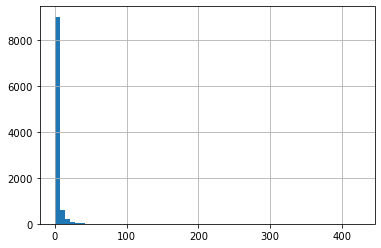

In [363]:
import matplotlib.pyplot as plt
print(df[df['CodeBlockLengthMean']>0]['CodeBlockLengthMean'].mean())
df['CodeBlockLengthMean'].hist(bins=60)
plt.show()